# Importing libaries and, reading the data 

In [5]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [6]:
data = pd.read_csv('SeoulBikeData.csv')
display(data)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Checking the basic statistical summary

In [32]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# checking for correlations amongst the variables

In [9]:
data.corr()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [ ]:
#data_dc = pd.get_dummies(data, columns=['Seasons','Holiday','Functioning Day'])

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder=  LabelEncoder()

In [12]:
cat_features=[x for x in data.columns if data[x].dtype=="object"]

for col in cat_features:
    if col in data.columns:
        i = data.columns.get_loc(col)
        data.iloc[:,i] = data.apply(lambda i:labelencoder.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [ ]:
#data_dc = pd.get_dummies(data, columns=['Holiday'])

In [ ]:
#data_dc = pd.get_dummies(data, columns=['Functioning Day'])

In [13]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,11,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,11,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,11,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,11,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,11,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [14]:
miss_val = data.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [15]:
miss_val[miss_val>0].sort_values(ascending = False)

Series([], dtype: int64)

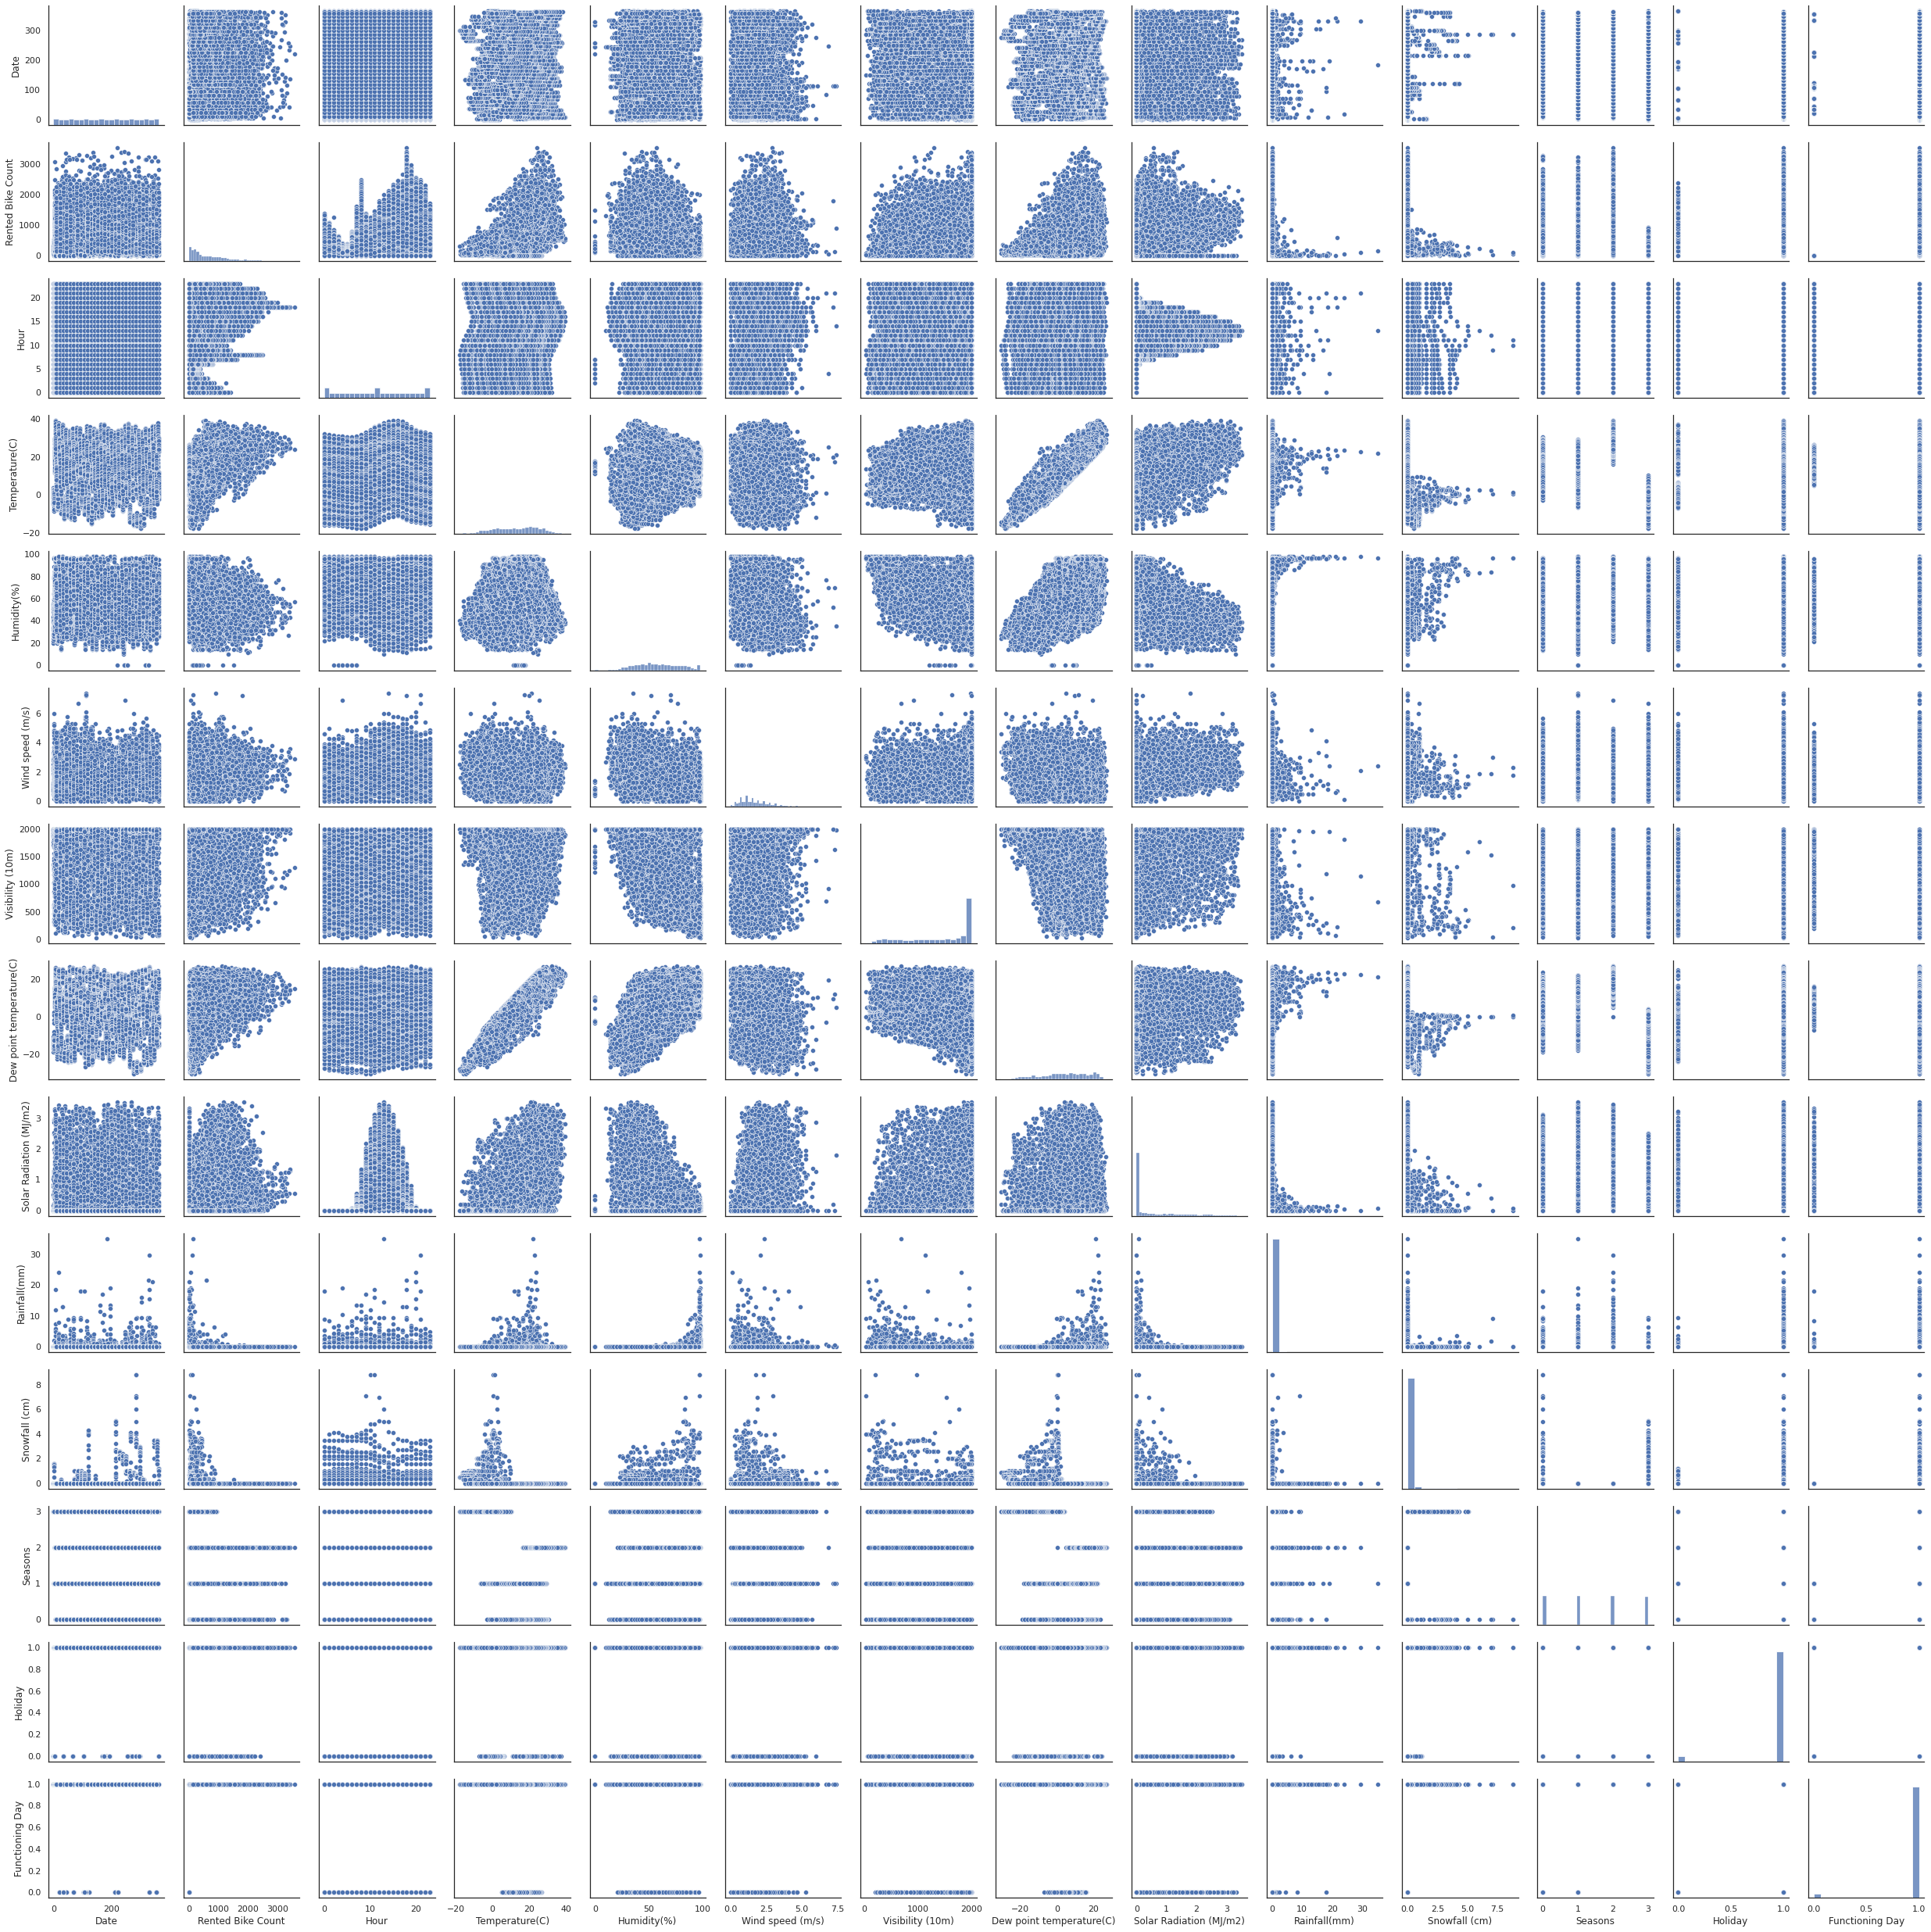

In [16]:
sns.pairplot(data)

# Splitting dataframe into train and test

In [ ]:
#data = data.drop(['Date'], axis = 1,inplace=True)

In [17]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [18]:
#data_train = data[:8760]

#data_test = data[8760:]

x=data.copy()
y=data['Rented Bike Count']
del x['Rented Bike Count']
del x['Date']
x.columns

Index(['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [20]:
print('Dimension of train_x dataframe:',X_train.shape)
print('Dimension of train_y datatframe:',Y_train.shape)
print('Dimension of val_x dataframe:',X_test.shape)
print('Dimension of val_y dataframe:',Y_test.shape)

Dimension of train_x dataframe: (7008, 12)
Dimension of train_y datatframe: (7008,)
Dimension of val_x dataframe: (1752, 12)
Dimension of val_y dataframe: (1752,)


In [21]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

data_pred = ln_reg.predict(X_test)
print('Mean Absolute Error of linear regression:', mean_absolute_error(data_pred, Y_test))
print('Mean Square Error of linear regression:', mean_squared_error(data_pred,Y_test))
print('R_Squard Score of linear regression:', r2_score(data_pred, Y_test))

Mean Absolute Error of linear regression: 318.5497421883347
Mean Square Error of linear regression: 179197.2627192169
R_Squard Score of linear regression: 0.2442550298289511


In [26]:
predic_entire = ln_reg.predict(x)

In [27]:
print('Mean Absolute Error of linear regression:', mean_absolute_error(predic_entire, y))
print('Mean Square Error of linear regression:', mean_squared_error(predic_test,y))
print('R_Squard Score of linear regression:', r2_score(predic_entire, y))

Mean Absolute Error of linear regression: 322.49952202535525
Mean Square Error of linear regression: 187563.13400959878
R_Squard Score of linear regression: 0.18611407115471357


In [ ]:
predic_test = ln_reg.predict(x)

#submission_data = pd.DataFrame({'Id':.Id,'Pred_RentedBikes':predic_test})
submission_data
Y_test = pd.DataFrame(Y_test)
Y_test['Predicted'] = submission_data['Pred_RentedBikes']

Y_test